In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env_test import env, replay_memory, collector, samplizer_
from env_test import policies as baseline_policy
from dqn_agent_test import agent
from transition import Transition
from preprocess_dqn import process_from_replay_sample as dqn_preprocess
import trainer

The initialization template is either None or invalid, the servers and jobs will be generated randomly


In [3]:
train_helper = trainer.Trainer(env, 
                               agent, 
                               collector, 
                               replay_memory,  
                               samplizer_, 
                               Transition, 
                               10)

In [4]:
train_helper.train(20) 

Episode  1, loss: 3.386058, iterations:   500, cum_reward: -2386.004031
Episode  2, loss: 3.775991, iterations:  1000, cum_reward: -2398.874280
Episode  3, loss: 4.201087, iterations:  1500, cum_reward: -2380.636832
Episode  4, loss: 4.257222, iterations:  2000, cum_reward: -2381.806412
Episode  5, loss: 3.649618, iterations:  2500, cum_reward: -2376.615726
Episode  6, loss: 4.476643, iterations:  3000, cum_reward: -2430.707029
Episode  7, loss: 3.534954, iterations:  3500, cum_reward: -2404.020856
Episode  8, loss: 4.131348, iterations:  4000, cum_reward: -2389.540709
Episode  9, loss: 3.993135, iterations:  4500, cum_reward: -2405.011976
Episode 10, loss: 3.533093, iterations:  5000, cum_reward: -2397.080140
Episode 11, loss: 4.278663, iterations:  5500, cum_reward: -2402.310817
Episode 12, loss: 4.205132, iterations:  6000, cum_reward: -2403.032148
Episode 13, loss: 3.976923, iterations:  6500, cum_reward: -2397.317294
Episode 14, loss: 4.368652, iterations:  7000, cum_reward: -2417

In [14]:
import random
action = 1
env.reset()
actions = [0] * 10
for i in range(480):
    t_t = Transition(*env.step(action))
    t_s = samplizer_.process(t_t)
    t_q = dqn_preprocess(t_s)
    
    # It's intersting that the policy network and target network don't give consistent results sometimes
    action = random.choice((int(agent.predict(t_q.state)), int(agent.predict_by_t(t_q.state))))
    # action = int(agent.predict(t_q.state))
    
    actions[action] += 1

In [26]:
from status_render import StatusRender
render = StatusRender(env)
render.job_status()

FigureWidget({
    'data': [{'name': 'CPU intensive jobs',
              'type': 'bar',
              'uid': '…

In [42]:
render.server_info()

FigureWidget({
    'data': [{'cells': {'align': 'center',
                        'values': [['Type', 'CPU Pow…

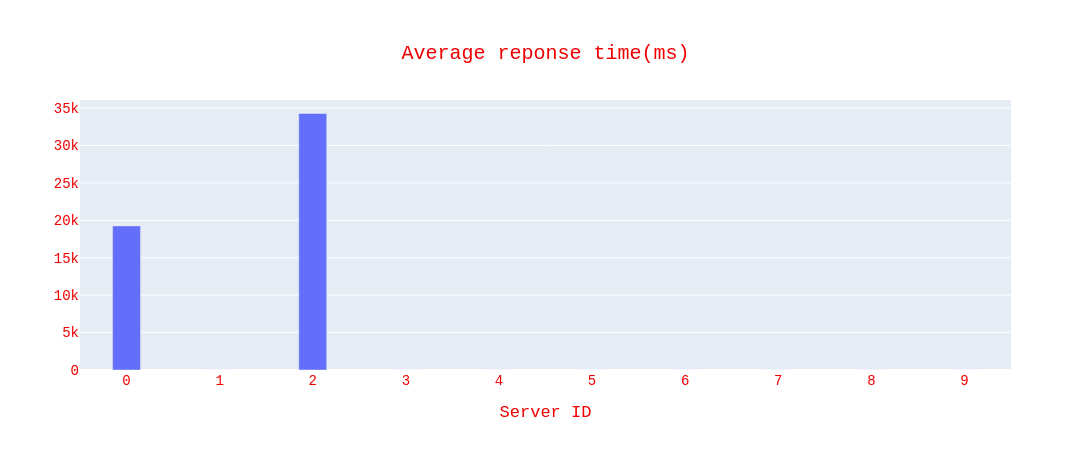

In [43]:
render.average_response_time()

In [24]:
import torch
with torch.no_grad():
    print(agent._policy_net(t_q.state).max(1))
agent._target_net(t_q.state)

torch.return_types.max(
values=tensor([9.4930e-12]),
indices=tensor([1]))


tensor([[0.5067, 0.5806, 0.4675, 0.5840, 0.4531, 0.5070, 0.5093, 0.4776, 0.5526,
         0.5032]], grad_fn=<SigmoidBackward>)

In [11]:
def policy_reward(env, policy):
    env.reset()
    while not env.is_terminal():
        env.step(policy())
    return env.cum_reward()

In [12]:
print("Reward by bseline policies:\n"
      "random:      {:3f}\n"
      "earlist:     {:3f}\n"
      "round_robin: {:3f}\n"
      "sensible:    {:3f}\n"
      "bestfit:     {:3f}".format(policy_reward(env, baseline_policy.random_policy),
                           policy_reward(env, baseline_policy.earlist_policy),
                           policy_reward(env, baseline_policy.round_robin_policy),
                           policy_reward(env, baseline_policy.sensible_policy),
                           policy_reward(env, baseline_policy.bestfit_policy)))

Reward by bseline policies:
random:      -2382.509234
earlist:     -2351.505930
round_robin: -2375.724902
sensible:    -2376.779648
bestfit:     -2236.804836


In [16]:
t_q.state

tensor([[-0.1306,  0.8694,  0.0758, -0.1294,  0.2206, -0.1294, -0.1294, -0.1294,
         -0.1294, -0.1294, -0.1294, -0.1294]])

In [47]:
[((12,2))]

[(12, 2)]

In [49]:
(12,2)[0:0]

()